# Predicting Heart Disease

**The following model predicts wether the person has heart disease or not based on various medical attributes provided by the medical facilities.**

Our approach to build a solution

1. Problem Defination
2. Getting the Data ML ready
3. Evaluation of our model
4. Features which are contributing and other which are not 
5. Modelling 
6. Experimentation
7. Putting it together

### 1. Problem Defination

> Given clinical parameter of a patient , predicting wehter the patient might have heart disease or not.

### 2. Getting the Data machine ready 

* The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

* There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

### 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

### 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the Tools Required

* We ll be using Pandas , Matplotlib , Numpy for Data Analysis and Manipulation

* We are gonna use Sci-kit Learn for modelling our estimator and makign the predictions 

In [1]:
# Importing all the tools all at one place 

# Importing EDA ( exploratory data analysis ) nad plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots apprear inside our jupyter notebook

%matplotlib inline 

# Importing the required Estimators / Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the evaluation metrics 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

## Load the Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape , df.size

((303, 14), 4242)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
# Lets find the count of the class

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

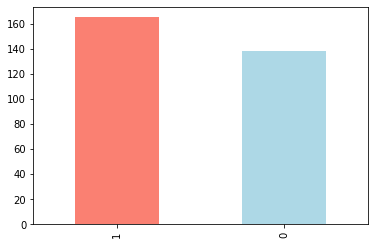

In [5]:
# Visualising how many of each classes we have

df["target"].value_counts().plot(kind = "bar" , color=["salmon" , "lightblue"]);

In [6]:
# Complete info about how are data is 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Quickly descrbing the data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Checking if there is any missing values 

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Drawing insights from the data by comparing columns

* Creating intuitions based on the data manually

In [9]:
# Comparing sex vs target column

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Here 1 stands for Male and 0 for Female
pd.crosstab(df.sex , df.target)

target,0,1
sex,,
0,24,72
1,114,93


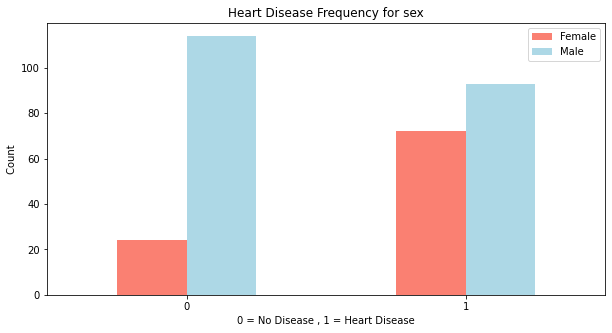

In [11]:
# Create a plot for the above crosstab

pd.crosstab(df.target , df.sex).plot(figsize = (10,5) ,kind = "bar" , color = ["salmon" , "lightblue"]);

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease , 1 = Heart Disease")
plt.ylabel(" Count ")
plt.legend(["Female" , "Male"])
plt.xticks(rotation = 0);

In [12]:
# Since its length is 91 i.e 91 values in thalach bar graph is not the ideal way to visualise it

df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart For Heart Disease 

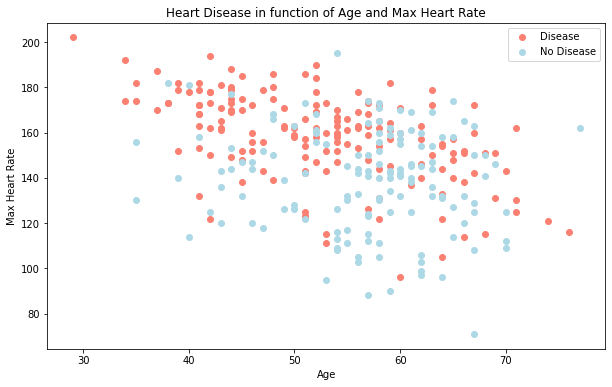

In [13]:
# Create another figure 
plt.figure(figsize = ( 10 ,6 ))

# Scatter with postive examples

plt.scatter(df.age[df.target==1] , 
            df.thalach[df.target == 1],
            c = "salmon");

# Scatter with negetive examples

plt.scatter(df.age[df.target==0] , 
            df.thalach[df.target == 0],
            c = "lightblue")

# Adding some communication

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease" , "No Disease"]);

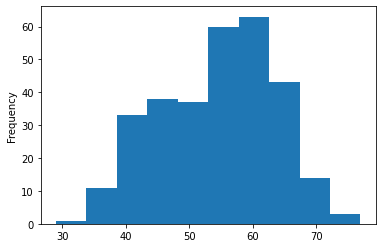

In [14]:
# Check the distribution or spread of age column with histogram
# Can help us check for outliers ( Anomaly data / sample )

df.age.plot(kind = "hist");

# df.age.hist()
# df.age.plot.hist()

## Heart Disease Frequence per Chest pain Type
**cp - chest pain type**

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


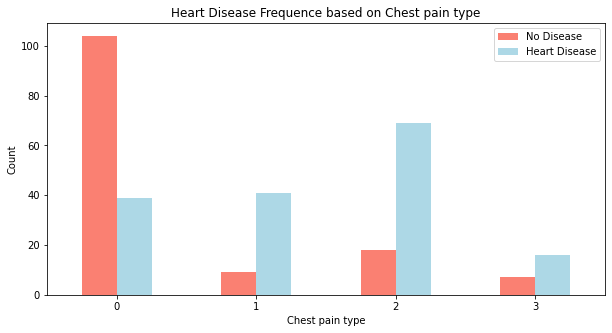

In [16]:
# Make the above crosstab more visual

pd.crosstab(df.cp , df.target).plot(kind = "bar" , figsize = (10 ,5) , color = ["salmon" , "lightblue"])
plt.title("Heart Disease Frequence based on Chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Count")
plt.legend(["No Disease" , "Heart Disease"])
plt.xticks(rotation = 0);

## Correlation Matrix 
* How each columns relate to each other

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


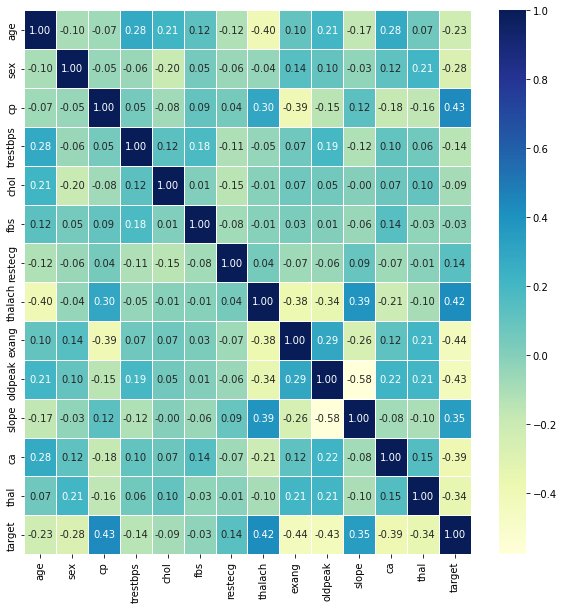

In [18]:
# Making the correlation matrix more visual

corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = ( 10 , 10))
ax = sns.heatmap(corr_matrix , annot = True , linewidths = 0.5 , fmt = ".2f" , cmap = "YlGnBu")
# Here fmt is format

# If the annots are not aligned properly 
# bottom , top = ax.get_ylims()
# ax.set_ylims(bottom + 0.5 , top - 0.5) 

In [19]:
# Positive correlation ( + ) mean as the value of it increase the chances of target being 1 also incraeses
# Negetive correlation ( - ) means as the value of it decreases the chance of not being heart diseasse increase

## Modelling 

In [20]:
np.random.seed(42)

# Splitting into X and y

X = df.drop("target" , axis = 1)
y = df.target

# Splitting data into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

### We are Going to try 3 Machine learning model on this data se 
1. RandomForestClassifier ( Despite its name , it is a classification model and not a regression )
2. K-nearest Neighbour Classifer
3. Logistic Regression

In [21]:
# Lets make a dictionery of the models

models = {"Logistic Regression" : LogisticRegression() ,
          " KNN " : KNeighborsClassifier(),
          "Random Forest Classifier" : RandomForestClassifier()}

# Making a function to fit and score the models

def fit_score(models , X_train , X_test , y_train , y_test):
    
    """
    The function takes the models dictionery as input , fits the given data and scores the model based on the test set
    X Train : Training data ( no labels )
    X Test : Testing data ( no labels )
    y Train : Training labels
    y Test : Testing labels
    """
    
    # Setting up the random seed
    np.random.seed(42)
    
    # Making an empty dictionery to store the scores
    
    model_scores = {}
    
    # Iteration through the modesl 
    
    for name , model in models.items():
        # Fit the data to the model to learn patterns
        model.fit(X_train , y_train)
        
        # Testing the trained model on the training data 
        model_scores[name] = model.score(X_test , y_test)
    
    return model_scores

In [22]:
model_scores = fit_score(models , X_train , X_test , y_train , y_test)
model_scores

C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


{'Logistic Regression': 0.8852459016393442,
 ' KNN ': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

#### Model Comparision

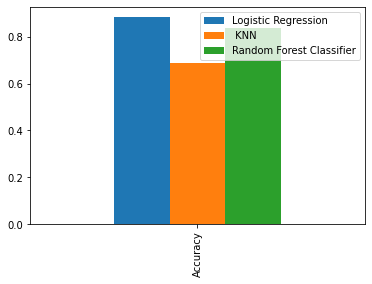

In [23]:
model_compare = pd.DataFrame(model_scores , index = ["Accuracy"])
model_compare.plot.bar();

#### Now that we have a hands on the baseline model , our next steps will be 
* Hyperparameter Tuning
* Feature Importance 
* Confusion Matrix
* Cross Validation
* Accuracy 
* Recall
* Precision
* F1 Score
* Classification Report
* ROC
* Area under the Curve ( AUC )

### Hyper Parameter Tuning

> Lets Improve K-Nearest Neighbours

In [24]:
# We saw that we can tune the parameter called n-neighbors

train_scores = []
test_scores = []

# Setting up the instance 

knn = KNeighborsClassifier()

# Looping through all the neighbors
neighbors = range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train , y_train)
    train_scores.append(knn.score(X_train , y_train))
    test_scores.append(knn.score(X_test , y_test))

C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature name

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

The maximum score achieved after HyperParameter Tuning is 75.41 %


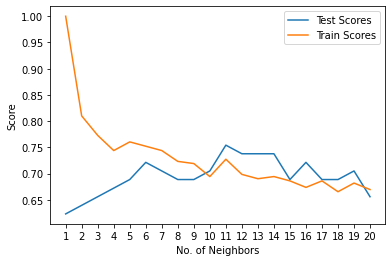

In [27]:
# Visualising the scores

plt.plot(neighbors , test_scores , label = "Test Scores")
plt.plot(neighbors , train_scores , label = "Train Scores")
plt.xticks(np.arange(1,21))
plt.xlabel("No. of Neighbors")
plt.ylabel("Score")
plt.legend()

print(f"The maximum score achieved after HyperParameter Tuning is {max(test_scores)*100:.2f} %")

#### Tuning using the Randomised Search CV

In [28]:
# Making the hyperparamter grids for the models 

# Grid for logistic Regression
log_reg_grid = {"C" : np.logspace(-4 , 4 , 20),
                "solver" : ["liblinear"]}

# Grid for Random Forest Classifier

rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50), # Advised to use continous distributions 
           "max_depth" : [None , 5 , 10 ,15 , 20],
           "min_samples_split" : np.arange(2 , 20 , 2 ),
           "min_samples_leaf" : np.arange(1 , 20 , 2)}

#### Tuning the Logistic regression

In [29]:
np.random.seed(42)

# Setting up the serach for randomised hyperparamers 

rs_log_reg = RandomizedSearchCV(LogisticRegression() , 
                                param_distributions=log_reg_grid,
                                cv = 5 , n_iter = 20 , verbose = True)

rs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(X_test , y_test)

0.8852459016393442

#### Tuning RandomForestClassifier

In [32]:
np.random.seed(42)

# Setting up the randomisied HyperParameter for tuning 

rs_rf_grid = RandomizedSearchCV( RandomForestClassifier() ,
                                 param_distributions = rf_grid ,
                                 n_iter = 20 ,
                                 cv = 5 ,
                                 verbose = True)

rs_rf_grid.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf_grid.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [34]:
rs_rf_grid.score(X_test , y_test)

0.8524590163934426

#### Hyperparameter tuning using GridSearchCV

> We are again gonna improve our LogisticRegression model as it give the highest accuracy out of the three models that we tried

In [35]:
np.random.seed(42)

# Making a Hyperparamter Grid For exhaustive search

log_reg_grid = {"C" : np.logspace(-4 , 4 , 30) , 
                "solver" : ["liblinear"]}

# Setting up the GridSearchCV

gs_log_reg = GridSearchCV(estimator = LogisticRegression() ,
                          param_grid = log_reg_grid,
                          cv = 5 , 
                          verbose = True)

gs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(X_test , y_test)

0.8852459016393442

### Evaluating our Tuned model beyond the accuracy metrics 

We' ll use 
* ROC and AUC
* Precission Score
* F1 Score 
* Recall Score
* Confusion Matrix
* Classification Report 

In [38]:
# For Comparision and evaluation we need to make some predictions first 

y_preds = gs_log_reg.predict(X_test)

C:\Users\ndahr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


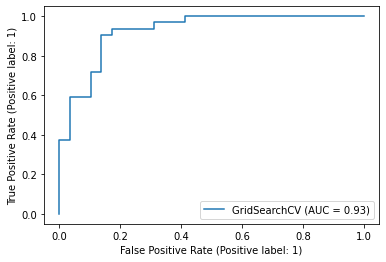

In [39]:
# Plot ROC CURVE and calculate AUC metrics 

plot_roc_curve(gs_log_reg , X_test , y_test)

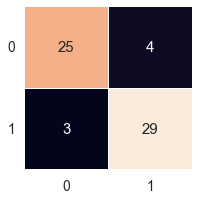

In [40]:
# Confusion Matrix 

conf_matrix = confusion_matrix(y_test , y_preds)

# Plotting it
sns.set(font_scale= 1.25)
fig , ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_matrix , linewidths = .5 , annot = True , cbar = False)
plt.yticks(rotation = 0);

In [41]:
# Classification Report and Cross Validated Precision , Recall and F1 score

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculating evaluation metrics using CrossValidation 


In [42]:
# Checking the best parameters for our models
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# Making a new model call using the best params for the log Reg estimator
clf = LogisticRegression(C = 0.20433597178569418 ,
                         solver = "liblinear")

In [44]:
# Using cross_val_score for accuracy

cv_acc = cross_val_score(clf , X , y , cv = 5 , scoring="accuracy")
cv_acc.mean()

0.8479781420765027

In [45]:
# Cross Validation for Precission

cv_pres = cross_val_score(clf , X , y , cv = 5 , scoring = "precision" )
cv_pres.mean()

0.8215873015873015

In [46]:
# Cross Validated recall

cv_r = cross_val_score(clf , X , y , cv = 5 , scoring = "recall")
cv_r.mean()

0.9272727272727274

In [47]:
# Cross validated f1 score 

cv_f = cross_val_score(clf , X , y , cv = 5 , scoring = "f1")
cv_f.mean()

0.8705403543192143

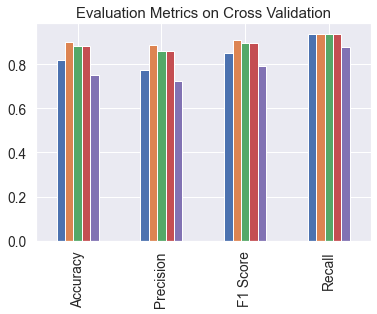

In [48]:
# Visualising our Cross Validated Scores 

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_pres ,
                           "F1 Score" : cv_f , 
                           "Recall" : cv_r})
cv_metrics.T.plot.bar(legend = False , title = "Evaluation Metrics on Cross Validation");

#### Feature Importance 

Which features contributed most for the prediction 

In [49]:
# Making our model again

clf = LogisticRegression(C = 0.20433597178569418 ,
                         solver = "liblinear")

clf.fit(X_train , y_train)

# Coefficient 

clf.coef_

array([[ 0.00316728, -0.86044675,  0.66067032, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.5686279 ,
         0.45051633, -0.63609907, -0.67663375]])

In [50]:
# Making it presentable 

feature_dict = dict(zip(df.columns , clf.coef_[0]))
feature_dict

{'age': 0.0031672830677295966,
 'sex': -0.8604467464181768,
 'cp': 0.6606703196786501,
 'trestbps': -0.011569931725970527,
 'chol': -0.0016637456109837993,
 'fbs': 0.04386101205953376,
 'restecg': 0.3127586484717099,
 'thalach': 0.024593615841597527,
 'exang': -0.6041309444844618,
 'oldpeak': -0.5686278978594388,
 'slope': 0.45051632904765737,
 'ca': -0.6360990721560912,
 'thal': -0.67663374706138}

In [51]:
# Presenting the Coefficients 
pd.DataFrame(feature_dict , index = feature_dict.keys())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
sex,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
cp,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
trestbps,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
chol,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
fbs,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
restecg,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
thalach,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
exang,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634
oldpeak,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312759,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


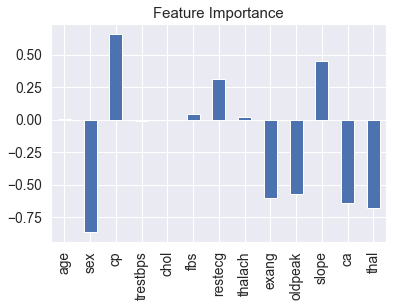

In [52]:
# Visualising Feature_dict

feature_df = pd.DataFrame(feature_dict , index = [0])
feature_df.T.plot.bar(title = "Feature Importance" , legend = False);

### 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current models? (beyond what we've done so far)